In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
iris_df = pd.read_csv('11_Iris.csv')
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,105,6.5,3.0,5.8,2.2,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
122,123,7.7,2.8,6.7,2.0,Iris-virginica
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values

In [5]:
iris_df.fillna(iris_df.median, inplace=True)
# replaced NaN values with median

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])

In [7]:
iris_df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
65,66,6.7,3.1,4.4,1.4,1
9,10,4.9,3.1,1.5,0.1,0
112,113,6.8,3.0,5.5,2.1,2
28,29,5.2,3.4,1.4,0.2,0
50,51,7.0,3.2,4.7,1.4,1
81,82,5.5,2.4,3.7,1.0,1
85,86,6.0,3.4,4.5,1.6,1
54,55,6.5,2.8,4.6,1.5,1
131,132,7.9,3.8,6.4,2.0,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:
iris_df.corr()['Species']

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

In [9]:
for i in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    if (iris_df.corr()['Species'][i]) < 0.1 and (iris_df.corr()['Species'][i] > -0.1):
        iris_df.drop(i,axis=1,inplace=True)
    else:
        pass

Above code will drop any column which has correlation with target variabe in the range -0.1 to 0.1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
for i in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    if iris_df[i].var() < 0.1:
        iris_df.drop(i,axis=1,inplace=True)
    else:
        pass

Above code will drop any column which has variance < 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

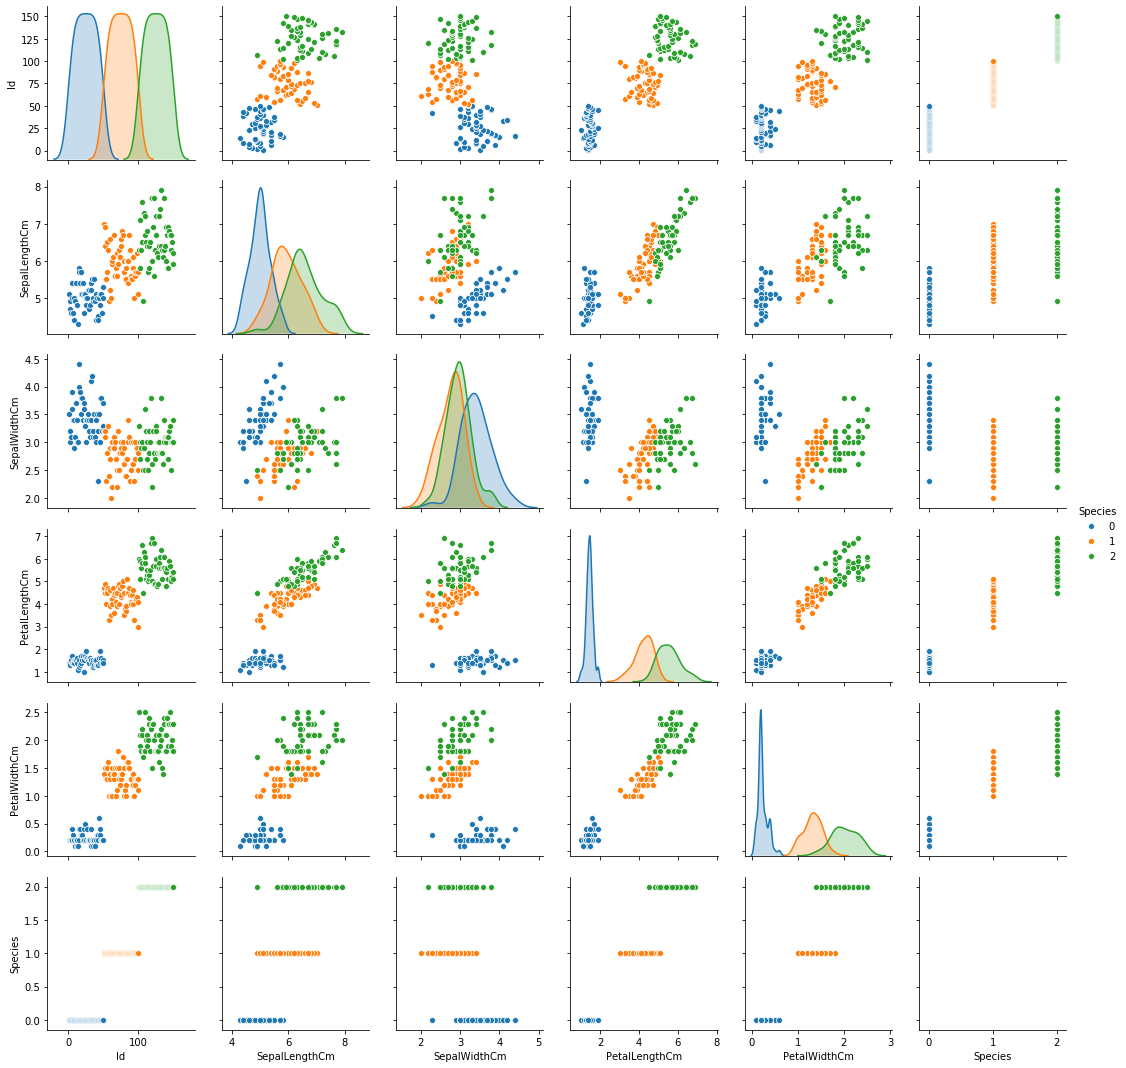

In [11]:
sns.pairplot(iris_df,diag_kind='kde',hue='Species')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [12]:
X = iris_df.drop('Species',axis=1)
y = iris_df.pop('Species')

In [13]:
seed = 7

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
for i in (3,5,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaledX_train,y_train)
    print("Training Accuracy Score of KNN model for k =",i,"is:",accuracy_score(knn.predict(scaledX_train),y_train)*100,"%")
    print("Testing Accuracy Score of KNN model for k =",i,"is:",accuracy_score(knn.predict(scaledX_test),y_test)*100,"%")

Training Accuracy Score of KNN model for k = 3 is: 100.0 %
Testing Accuracy Score of KNN model for k = 3 is: 96.66666666666667 %
Training Accuracy Score of KNN model for k = 5 is: 100.0 %
Testing Accuracy Score of KNN model for k = 5 is: 96.66666666666667 %
Training Accuracy Score of KNN model for k = 9 is: 100.0 %
Testing Accuracy Score of KNN model for k = 9 is: 93.33333333333333 %


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [16]:
neighbors = list(range(1,20,2))
# creating odd list of K for KNN
test_scores = []
# empty list that will host test accuracy scores
for j in neighbors:
    knn1 = KNeighborsClassifier(n_neighbors=j)
    knn1.fit(scaledX_train,y_train)
    test_scores.append(accuracy_score(knn1.predict(scaledX_test),y_test))

In [17]:
mse = [1-a for a in test_scores]
# changing to misclassification error

In [18]:
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 3


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

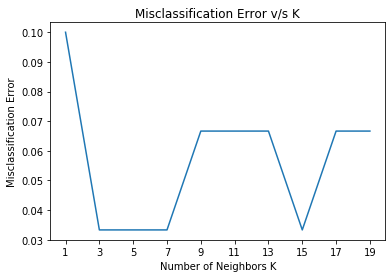

In [19]:
# plotting misclassification error vs k
plt.plot(neighbors,mse)
plt.title("Misclassification Error v/s K")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.xticks(range(1,20,2))
plt.show()

# Naive Bayes with Iris Data

In [20]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

Already defined in Question 7 above, can not run the same code again

X = iris_df.drop('Species',axis=1)

y = iris_df.pop('Species')

In [22]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

Text(0, 0.5, 'Number of data points')

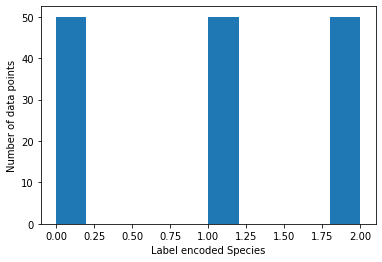

In [23]:
plt.hist(y)
plt.xlabel('Label encoded Species')
plt.ylabel("Number of data points")

In [24]:
#Drop Id variable from data
iris_df.drop('Id',axis=1,inplace=True)

### Question 12 
Find Correlation among all variables and give your insights 

In [25]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [41]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Petal Width is highly correlated to the Petal Length (arround 0.96), so both will contribute the same in the model. So, either of the columns can be dropped unless they hold domain critical info.

### Split data in Training and test set in 80:20.

Already defined in Question 7 above, can not run the same code again

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

### Question 13 
Do Feature Scaling 

In [42]:
# Use StandardScaler or similar methods

Already defined in Quesion 8, can not run the same code again.

sc=StandardScaler()

scaledX_train = sc.fit_transform(X_train)

scaledX_test = sc.transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [43]:
#Fit the model
GB = GaussianNB()
GB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
#Predict
ypred_GB = GB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [45]:
# show Confusion Matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,ypred_GB))

[[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]


In [47]:
# show accuracy
print(GB.score(X_test,y_test))

0.9666666666666667


In [46]:
#Show precision and Recall metrics
print(metrics.classification_report(y_test,ypred_GB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        12
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Since, there are no mis-classifications for Class 0, precision (7/7) and recall (7/7) are both 1.

Out of the 13 data points from the predicted Class 1, 12 have been correctly classified - so the precision is approx 0.92 (12/13). Out of the 12 actual Class 1 data points, all were predicted accurately so the recall is 1 (12/12).

Out of the 10 data points from the predicted Class 2, all have been correctly classified - so the precision is 1 (10/10). Out of the 11 actual Class 2 data points, 10 were predicted accurately so the recall is approx 0.91 (10/11).


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [32]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [33]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [34]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [35]:
# use from sklearn.svm import SVC

In [36]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [37]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [38]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [39]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 

neighbors = np.arange(1,20,2)
MSE_plot = np.empty(len(neighbors))
for j,k in enumerate(neighbors):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train,y_train)
    MSE_plot[j] = (1-accuracy_score(knn.predict(X_test),y_test)